# Data availability

Investigating possible data sources for high-quality evidence, and whether open-access fulltexts are available.

## 3ie

The [3ie Development Evidence Portal](https://developmentevidence.3ieimpact.org) has a database of more than 15,000 documents with extensive metadata. These are mostly impact evaluations of single projects, and also more than 1,000 systematic reviews.

The database is accessible via GraphQL API.

In [1]:
query = {
    "operationName": "KEYWORD_SEARCH",
    "variables": {
        "data": {
            "from": 0,
            "keyword": "",
            "size": "20000",
            "sort_by": "relevance",
            "filters": {},
        }
    },
    "query": """query KEYWORD_SEARCH($data: KeywordSearchInput!) {
  keywordSearch(data: $data) {
    search_result {
      title
      language
      year_of_publication
      publication_type
      publication_url
      abstract
      open_access
      doi
      additional_url {
        additional_url_address
        additional_url
      }
    }
  }
}
""",
}

In [2]:
from util import get, post

response = post("https://api.developmentevidence.3ieimpact.org//graphql", json=query)
articles = response.json()["data"]["keywordSearch"]["search_result"]
len(articles)

15125

In [3]:
from collections import Counter

oa = [a["open_access"] for a in articles]
oa = [a.lower() if a else "na" for a in oa]
Counter(oa)

Counter({'yes': 9238, 'no': 4105, 'na': 1782})

In [4]:
urls = [
    a["publication_url"]
    for a in articles
    if a["open_access"] and a["open_access"].lower() == "yes"
]
Counter([True if u and "http" in u else False for u in urls])

Counter({True: 9114, False: 124})

There's about 9,000 open access articles available.

Now let's look specifically at systematic reviews in the health sector:

In [5]:
query = {
    "operationName": "KEYWORD_SEARCH",
    "variables": {
        "data": {
            "from": 0,
            "keyword": "",
            "size": "20000",
            "sort_by": "relevance",
            "filters": {
                "product_type": ["srr"],
                "sector_name": [
                    "Health facilities and construction",
                    "Public admin - Health",
                    "Health",
                ],
            },
        }
    },
    "query": """query KEYWORD_SEARCH($data: KeywordSearchInput!) {
  keywordSearch(data: $data) {
    search_result {
      title
      language
      year_of_publication
      publication_type
      publication_url
      open_access
      doi
    }
  }
}
""",
}
response = post("https://api.developmentevidence.3ieimpact.org//graphql", json=query)
health_articles = response.json()["data"]["keywordSearch"]["search_result"]
print(len(health_articles), "articles overall")
urls = [
    a["publication_url"]
    for a in health_articles
    if a["open_access"] and a["open_access"].lower() == "yes"
]
urls = [True if u and "http" in u else False for u in urls]
print(sum(urls), "with open access urls")

775 articles overall
591 with open access urls


How much full-text information is available as metadata?

In [6]:
query = {
    "operationName": "KEYWORD_SEARCH",
    "variables": {
        "data": {
            "from": 0,
            "keyword": "",
            "size": "1000",
            "sort_by": "relevance",
            "filters": {},
        }
    },
    "query": """query KEYWORD_SEARCH($data: KeywordSearchInput!) {
  keywordSearch(data: $data) {
    search_result {
      product_type
      title
      synopsis
      id
      short_title
      language
      sector_name
      journal
      journal_volume
      journal_issue
      year_of_publication
      publication_type
      publication_url
      grantholding_institution
      evidence_programme
      context
      research_questions
      main_finding
      review_type
      quantitative_method
      qualitative_method
      overall_of_studies
      overall_of_high_quality_studies
      overall_of_medium_quality_studies
      headline_findings
      pages
      evaluation_design
      publisher_location
      status
      threeie_funded
      threeie_produced
      is_bookmark
      based_on_the_above_assessments_of_the_methods_how_would_you_rate_the_reliability_of_the_review
      abstract
      open_access
      doi
      equity_focus
      equity_dimension
      equity_description
      keywords
      evaluation_method
      mixed_methods
      unit_of_observation
      methodology
      main_findings
      background
      objectives
      region
      stateprovince_name
      district_name
      citytown_name
      location_name
      study_status
      additional_url {
        additional_url_address
        additional_url
        __typename
      }
      impact_evaluations
      systematic_reviews
      dataset_url
      dataset_available
      __typename
    }
  }
}
""",
}

In [7]:
from requests import post

response = post("https://api.developmentevidence.3ieimpact.org//graphql", json=query)
articles = response.json()["data"]["keywordSearch"]["search_result"]

In [8]:
import pandas as pd

df = pd.DataFrame(articles)

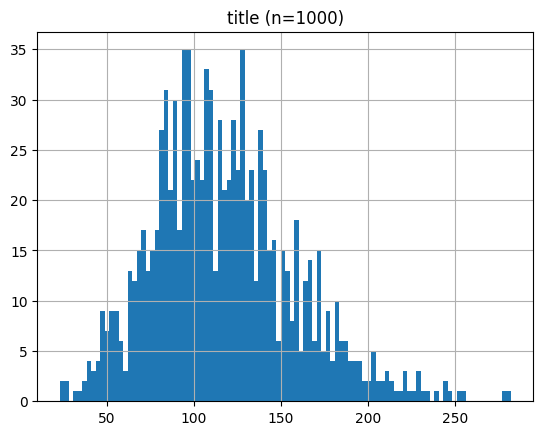

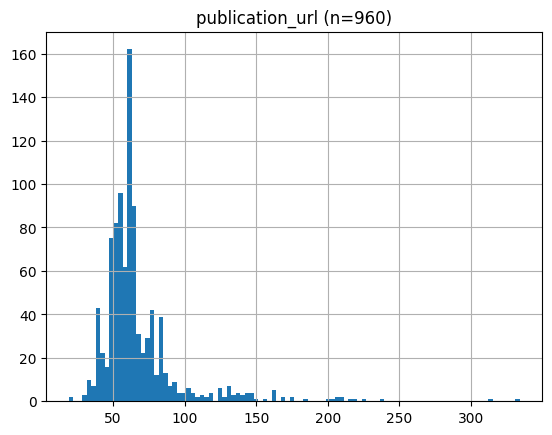

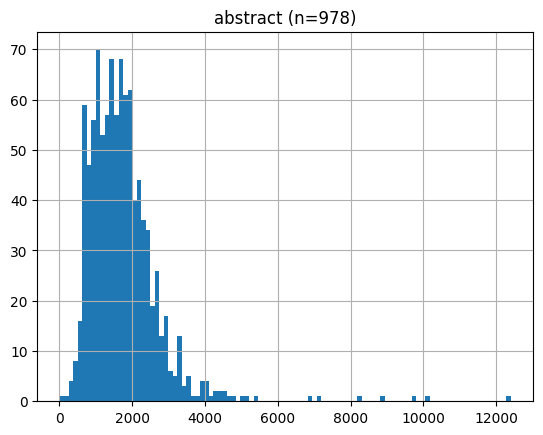

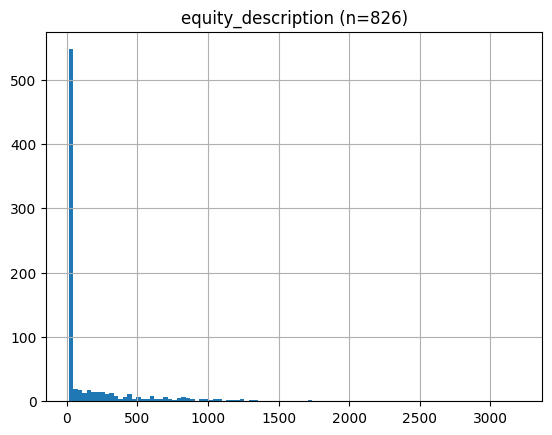

In [9]:
import matplotlib.pyplot as plt

for col in df.columns:
    if df[col].dtype == "object":
        n = len(df[df[col].notnull()])
        if n> 10 and df[col].str.len().mean() > 50:
            df[col].str.len().hist(bins=100)
            plt.title(f"{col} (n={n})")
            plt.show()
